# Week1: Data Understanding and Cleaning

#### A. Importing Required Libraries and Dataset

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('/content/in-vehicle-coupon-recommendation (2).csv')


#### Exploring the Dataset


In [ ]:
# Get information about the entire dataset
print(data.info())

# Display the first few rows of the dataset
print(data.head())

# Display the data types of each column
print(data.dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

#### Identify Categorical and Numerical Columns

In [ ]:
# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: ['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
Numerical Columns: ['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


#### B. Handle Missing Values
###### Drop Columns with Too Many Missing Values

In [ ]:
# Define a threshold for dropping columns with >50% missing values
threshold = 0.5 * len(data)
data = data.dropna(thresh=threshold, axis=1)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


##### Fill Missing Values in Categorical Columns with Mode

In [ ]:
categorical_cols = [
    'destination', 'passanger', 'weather', 'time', 'coupon',
    'expiration', 'gender', 'maritalStatus', 'education', 'occupation', 'income', 'CarryAway', 'RestaurantLessThan20', 'CoffeeHouse'
]

# Find the mode and fill missing values
for col in categorical_cols:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)
    print(f"Filled missing values for {col} with mode: {mode_value}")

Filled missing values for destination with mode: No Urgent Place
Filled missing values for passanger with mode: Alone
Filled missing values for weather with mode: Sunny
Filled missing values for time with mode: 6PM
Filled missing values for coupon with mode: Coffee House
Filled missing values for expiration with mode: 1d
Filled missing values for gender with mode: Female
Filled missing values for maritalStatus with mode: Married partner
Filled missing values for education with mode: Some college - no degree
Filled missing values for occupation with mode: Unemployed
Filled missing values for income with mode: $25000 - $37499
Filled missing values for CarryAway with mode: 1~3
Filled missing values for RestaurantLessThan20 with mode: 1~3
Filled missing values for CoffeeHouse with mode: less1


<ipython-input-628-2f0a29ae36e3>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_value, inplace=True)
<ipython-input-628-2f0a29ae36e3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].fillna(mode_value, inplace=True)


#### C. Handle Inconsistencies in Categorical Data

In [ ]:
# Standardizing categorical values in the 'coupon' column
data['coupon'] = data['coupon'].replace({'less1': 'Less than 1', 'Less1': 'Less than 1'})
data.head()


<ipython-input-629-ae9b328f1ec4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['coupon'] = data['coupon'].replace({'less1': 'Less than 1', 'Less1': 'Less than 1'})


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0


#### D. Encode categorical variables using one-hot encoding for features such as destination, weather, and coupon.

In [ ]:
# One-hot encoding for categorical variables
data = pd.get_dummies(data, columns=['destination', 'weather', 'coupon'], drop_first=True)


#### E.  Scale numerical variables like temperature, toCoupon_GEQ5min, toCoupon_GEQ15min, and toCoupon_GEQ25min using StandardScaler

In [ ]:

scaler = StandardScaler()
numerical_cols = ['temperature', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Save the cleaned dataset to a CSV file
data.to_csv('cleaned_dataset.csv', index=False)

# Week 2: Exploratory Data Analysis (EDA)

#### A. Visualize relationships between the target variable (Y) and categorical features like weather, time, passenger, and age

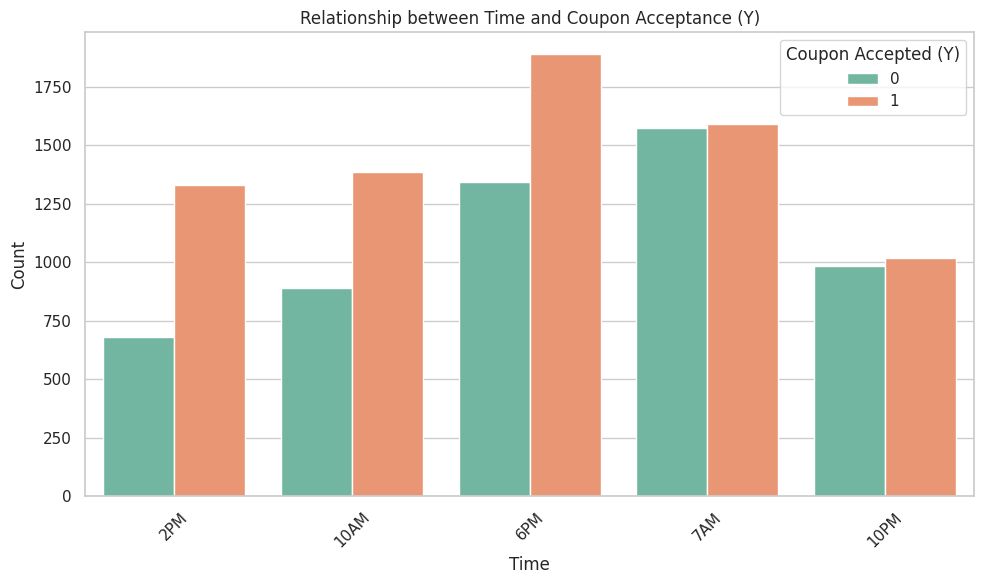

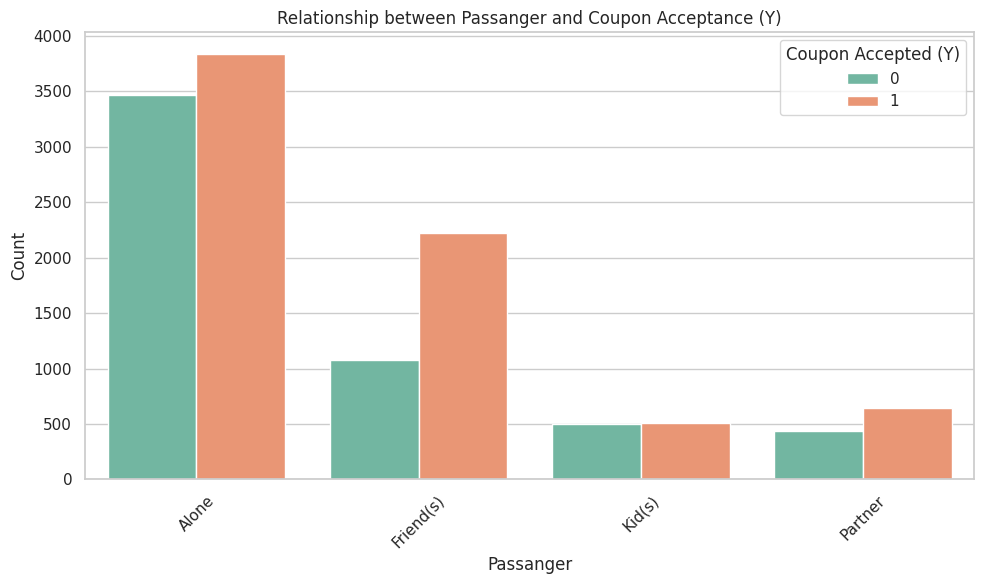

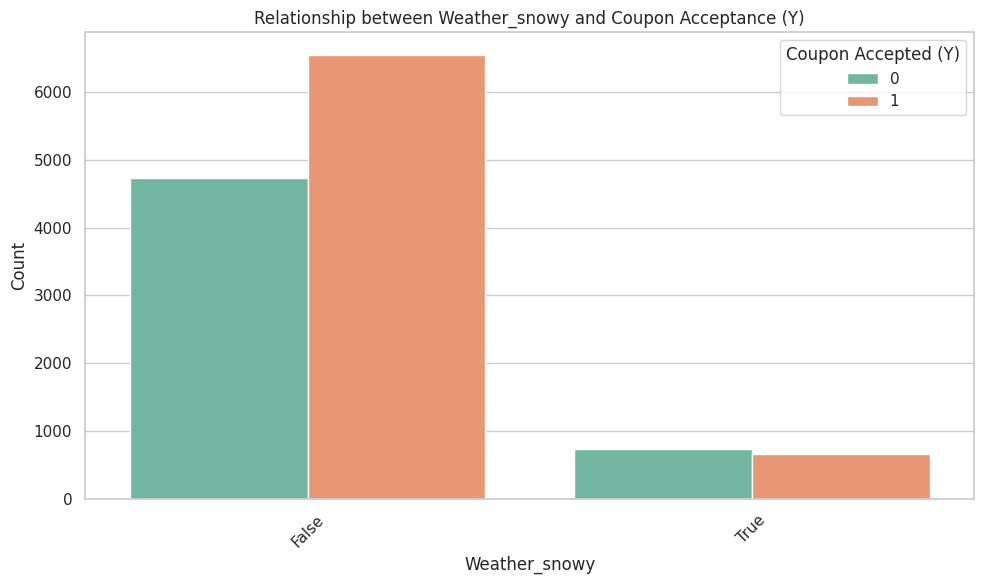

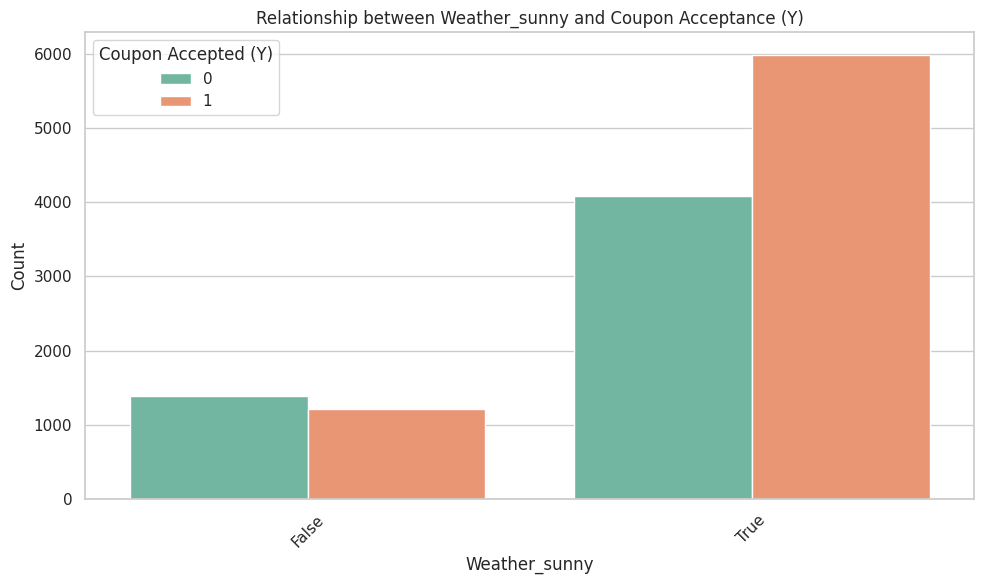

In [ ]:
# Set up the plot style
sns.set(style="whitegrid")

# Define the categorical features to visualize
categorical_features = ['time', 'passanger', 'weather_Snowy', 'weather_Sunny']

# Visualize the relationship between the target variable (Y) and each categorical feature
for feature in categorical_features:
    if feature in data.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=data, x=feature, hue='Y', palette='Set2')
        plt.title(f'Relationship between {feature.capitalize()} and Coupon Acceptance (Y)')
        plt.xlabel(feature.capitalize())
        plt.ylabel('Count')
        plt.legend(title='Coupon Accepted (Y)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{feature}' does not exist in the DataFrame and will be skipped.")


#### B. Analyze Trends in Coupon Acceptance Based on Categorical Features

##### Using bar plots to visualize the distribution of coupon acceptance (Y) across different categorical features.

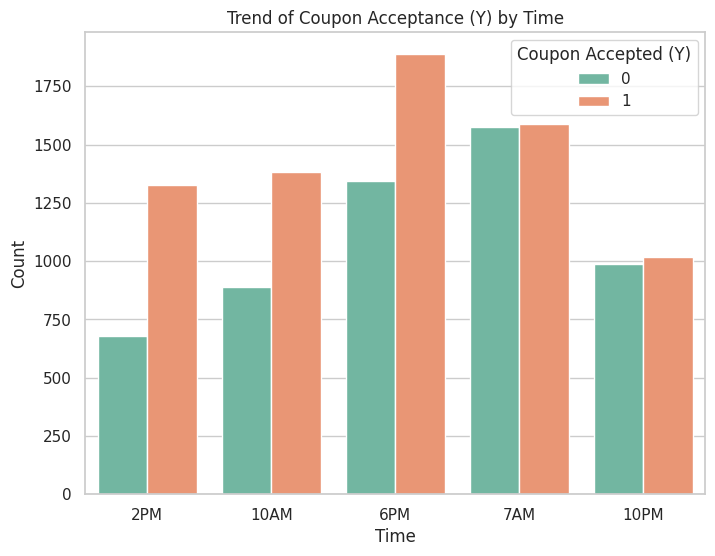

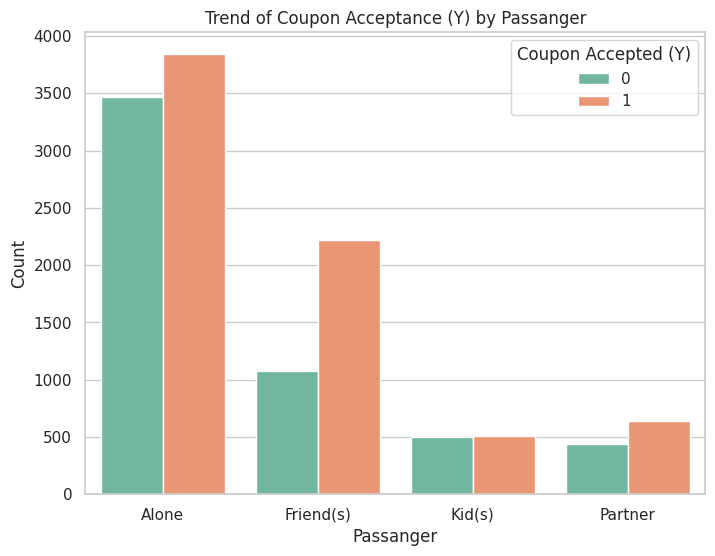

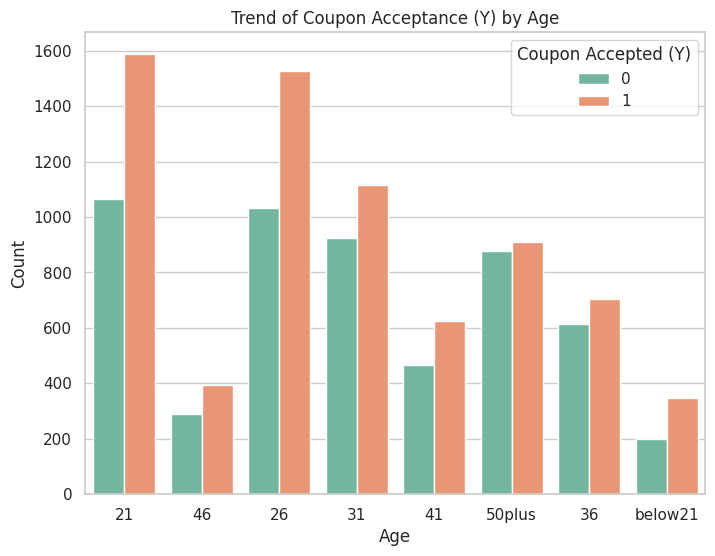

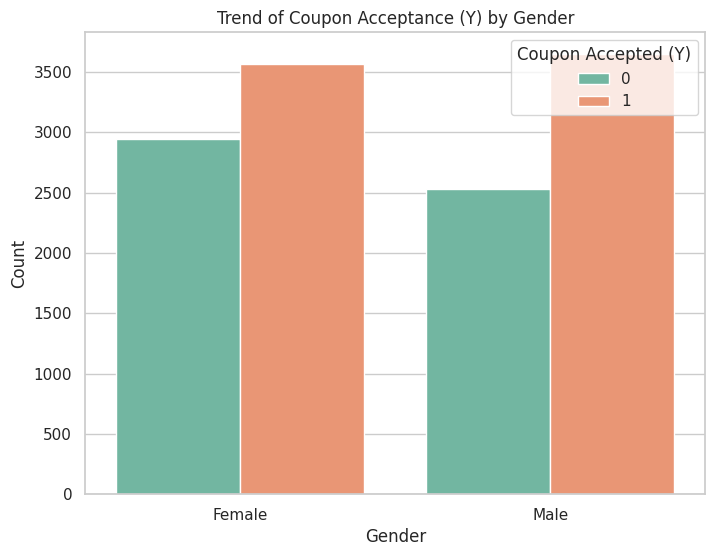

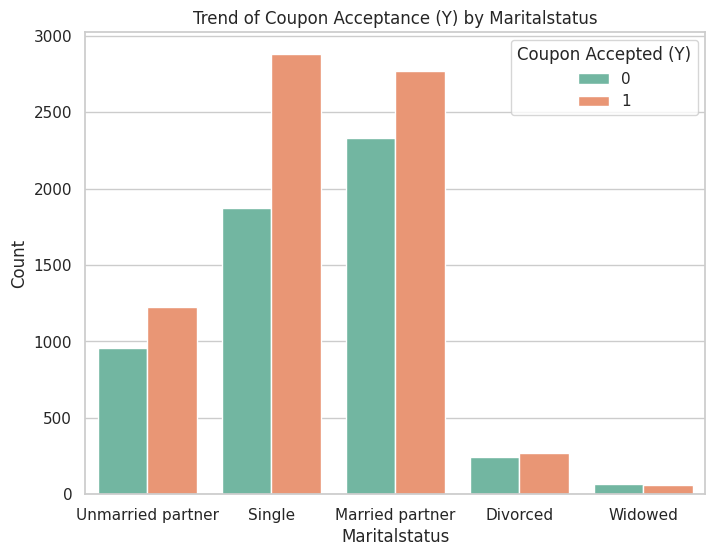

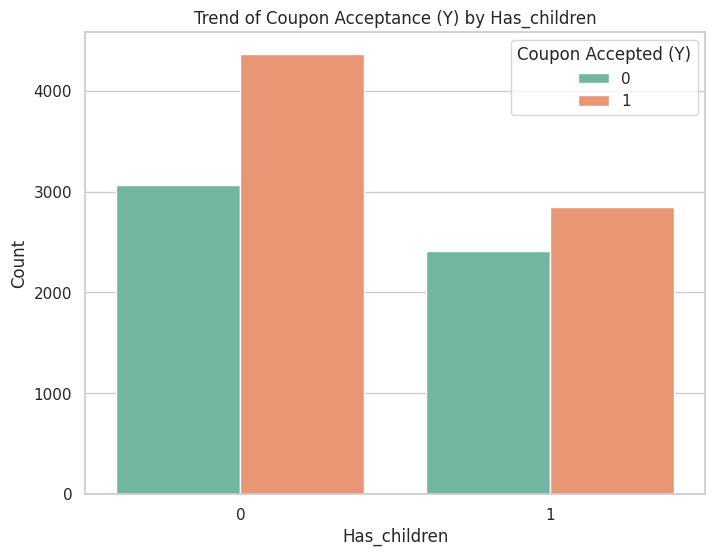

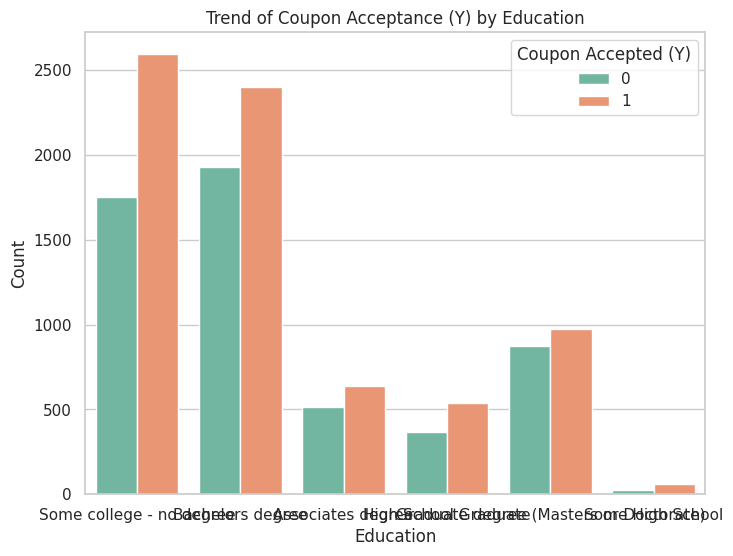

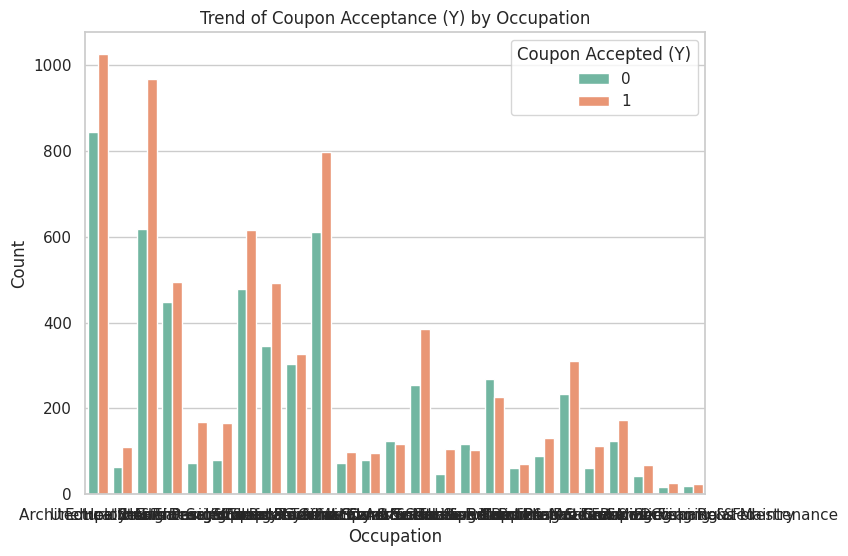

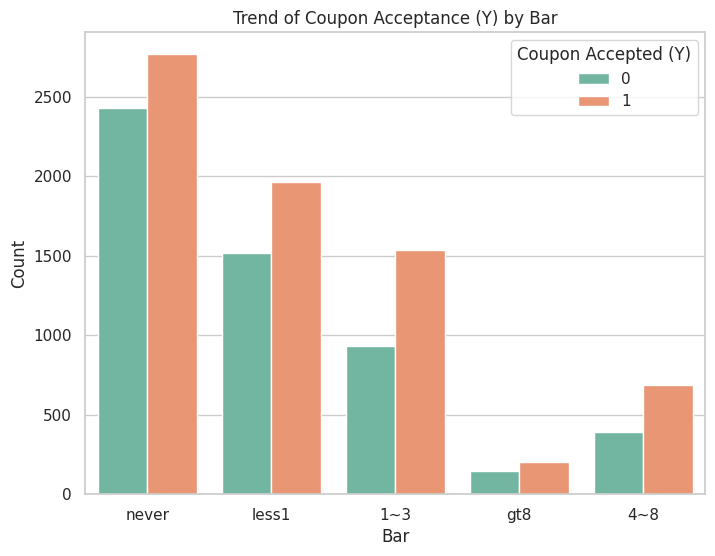

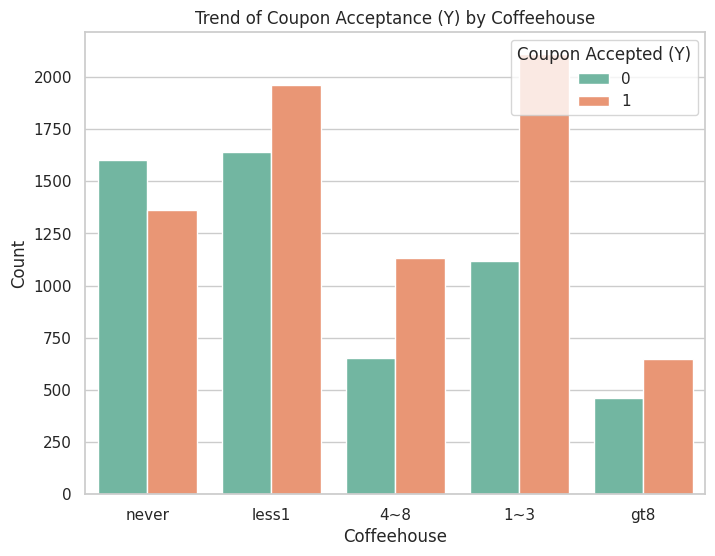

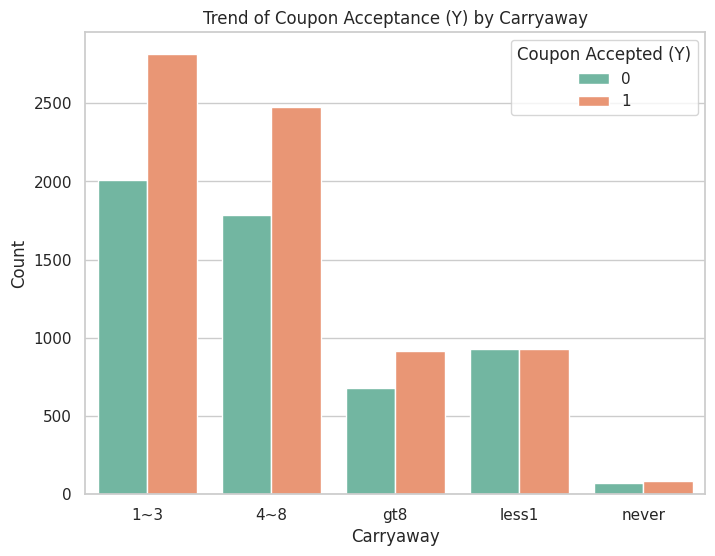

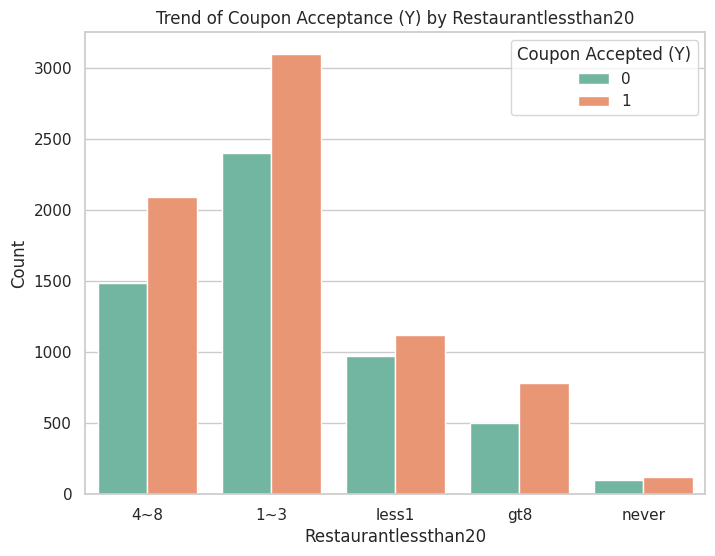

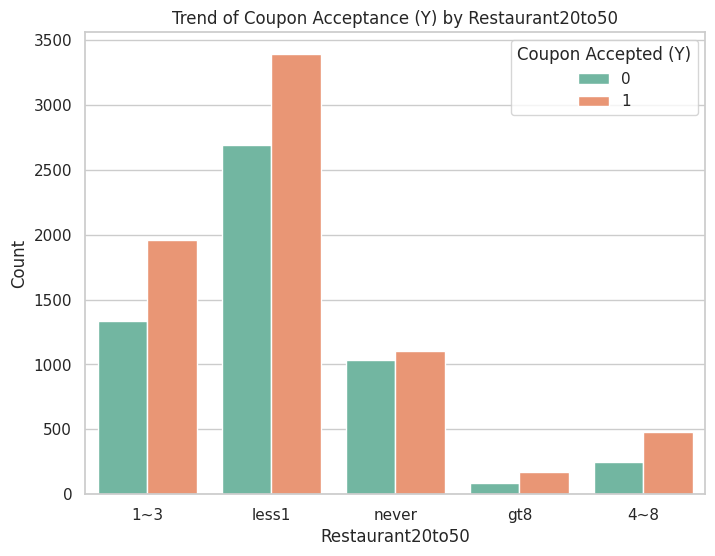

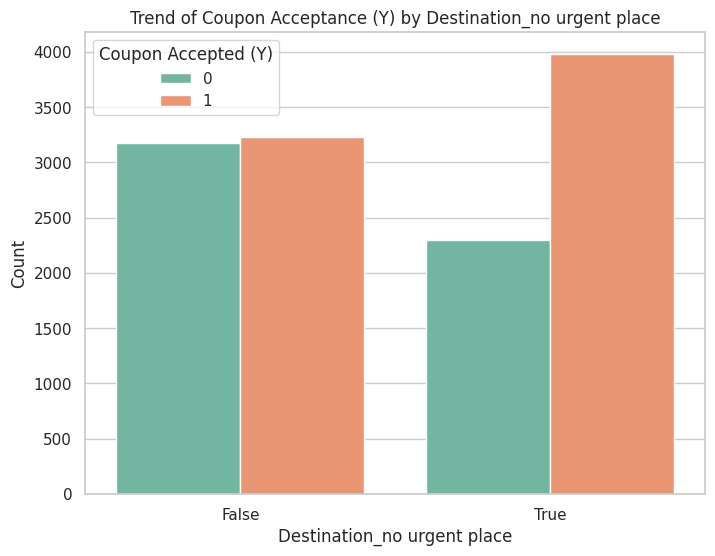

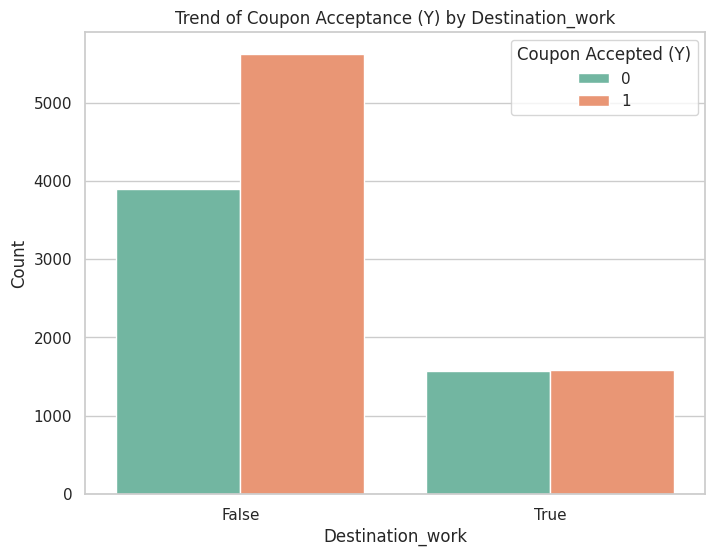

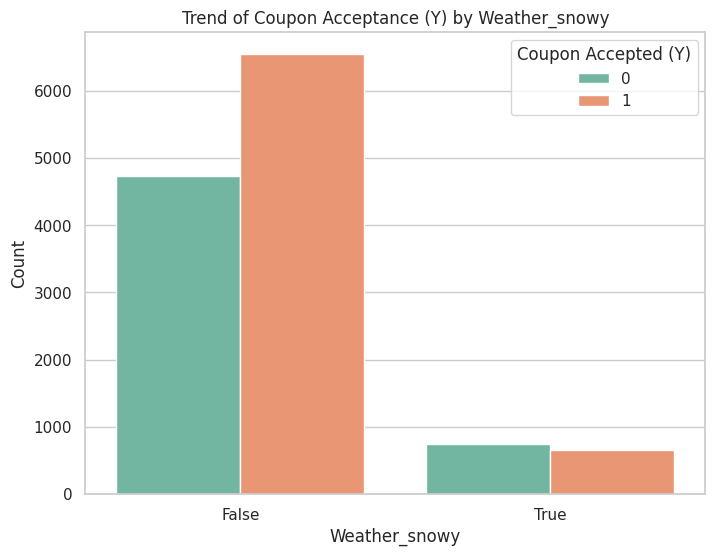

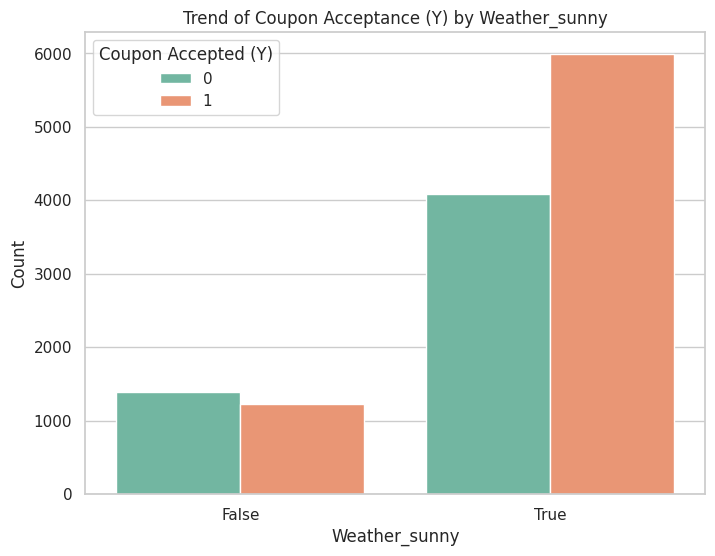

In [ ]:
# Set up the plot style
sns.set(style="whitegrid")

# Including more categorical features for better analysis
categorical_features = [
    'time', 'passanger', 'age', 'gender', 'maritalStatus',
    'has_children', 'education', 'occupation', 'Bar',
    'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
    'Restaurant20To50', 'destination_No Urgent Place',
    'destination_Work', 'weather_Snowy', 'weather_Sunny'
]

# Visualize coupon acceptance trends for each categorical feature
for feature in categorical_features:
    if feature in data.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=data, x=feature, hue='Y', palette='Set2')
        plt.title(f'Trend of Coupon Acceptance (Y) by {feature.capitalize()}')
        plt.xlabel(feature.capitalize())
        plt.ylabel('Count')
        plt.legend(title='Coupon Accepted (Y)')
        plt.show()
    else:
        print(f"Column '{feature}' does not exist in the DataFrame and will be skipped.")


#### C. Perform Correlation Analysis between numerical features and the target variable (Y)

Correlation with Target Variable (Y):
temperature          0.061240
has_children        -0.045557
toCoupon_GEQ5min          NaN
toCoupon_GEQ15min   -0.081602
toCoupon_GEQ25min   -0.103633
direction_same       0.014570
direction_opp       -0.014570
Name: Y, dtype: float64


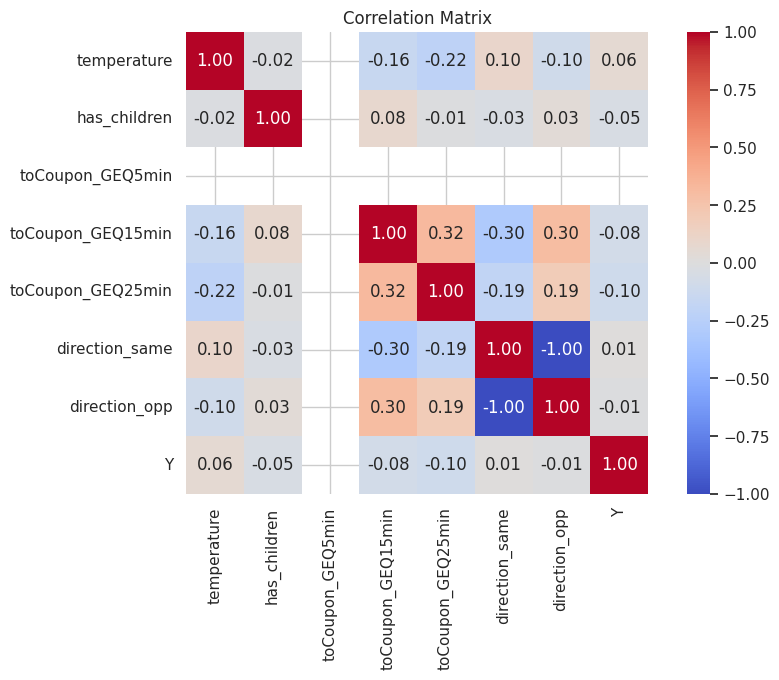

In [ ]:
# Columns for correlation analysis
numerical_columns = ['temperature', 'has_children', 'toCoupon_GEQ5min',
                     'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
                     'direction_same', 'direction_opp', 'Y']

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Extract the correlation with the target variable Y
correlation_with_target = correlation_matrix['Y'].drop('Y')

# Print the correlation with target variable (Y)
print("Correlation with Target Variable (Y):")
print(correlation_with_target)

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


#### D.  Visualize distributions of key numerical features (e.g., temperature, toCoupon_GEQXmin) and their impact on coupon acceptance

Correlation with Target Variable (Y):
temperature          0.061240
has_children        -0.045557
toCoupon_GEQ5min          NaN
toCoupon_GEQ15min   -0.081602
toCoupon_GEQ25min   -0.103633
direction_same       0.014570
direction_opp       -0.014570
Name: Y, dtype: float64


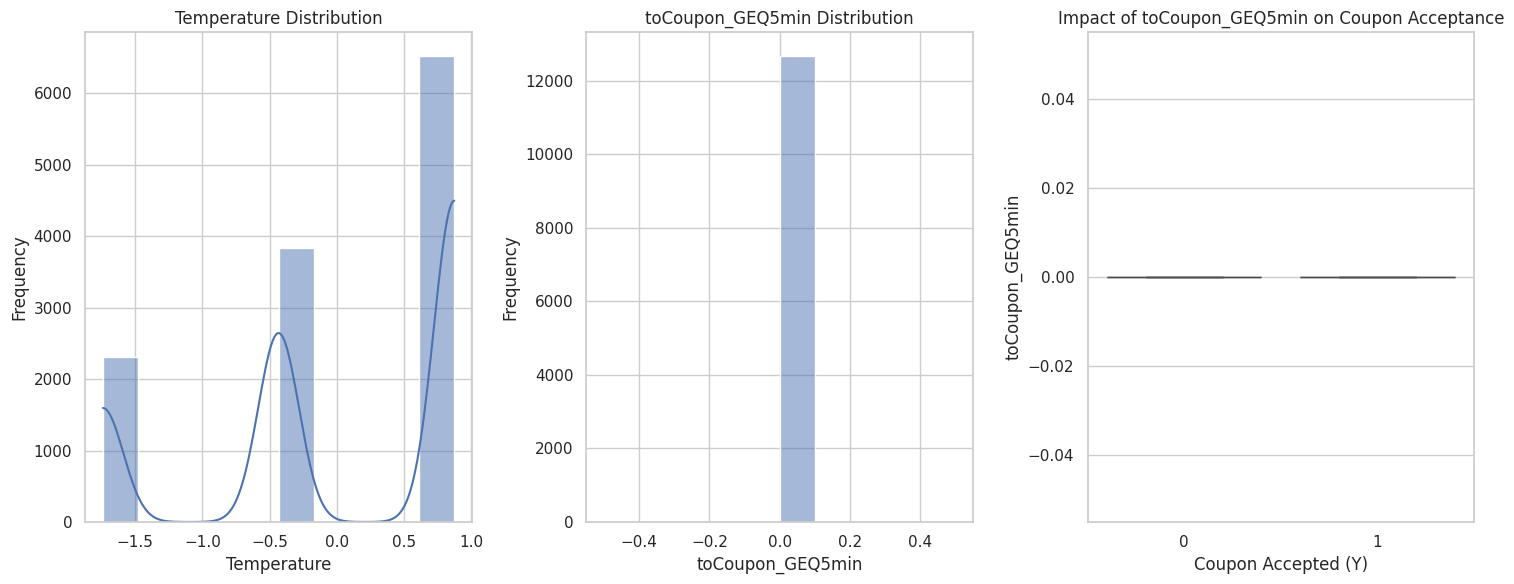

In [ ]:
correlation_matrix = data[['temperature', 'has_children', 'toCoupon_GEQ5min',
                            'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
                            'direction_same', 'direction_opp', 'Y']].corr()

correlation_with_target = correlation_matrix['Y'].drop('Y')
print("Correlation with Target Variable (Y):")
print(correlation_with_target)

# Visualize distributions of key numerical features
sns.set(style='whitegrid')

# Create a figure to hold multiple plots
plt.figure(figsize=(15, 6))

# Temperature Distribution
plt.subplot(1, 3, 1)
sns.histplot(data['temperature'], bins=10, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# toCoupon_GEQ5min Distribution
plt.subplot(1, 3, 2)
sns.histplot(data['toCoupon_GEQ5min'], bins=10, kde=True)
plt.title('toCoupon_GEQ5min Distribution')
plt.xlabel('toCoupon_GEQ5min')
plt.ylabel('Frequency')

# Visualizing impact of toCoupon_GEQ5min on coupon acceptance (Y)
plt.subplot(1, 3, 3)
sns.boxplot(x='Y', y='toCoupon_GEQ5min', data=data)
plt.title('Impact of toCoupon_GEQ5min on Coupon Acceptance')
plt.xlabel('Coupon Accepted (Y)')
plt.ylabel('toCoupon_GEQ5min')

# Show plots
plt.tight_layout()
plt.show()


# Week 3: Machine Learning Models

##### A. Split the data into training and test sets (80% training, 20% testing)

In [ ]:
# Prepare features and target variable
X = data.drop('Y', axis=1)
y = data['Y']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (10147, 29)
Test set shape: (2537, 29)


#### B. Implement and evaluate different machine learning models:

In [ ]:
# Initialize the models
logistic_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()

#####  Logistic Regression: A basic linear model to predict coupon acceptance

In [ ]:
# Convert categorical columns to dummy variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align the train and test data, filling any missing columns with 0
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Fit the logistic regression model
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

#### C. Evaluate model performance using metrics such as accuracy, precision, recall, and F1-score.

In [ ]:
# Print metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic)}")
print(f"Precision: {precision_score(y_test, y_pred_logistic)}")
print(f"Recall: {recall_score(y_test, y_pred_logistic)}")
print(f"F1 Score: {f1_score(y_test, y_pred_logistic)}")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Metrics:
Accuracy: 0.683878596767836
Precision: 0.6907605279698303
Recall: 0.7799858055358411
F1 Score: 0.7326666666666667
              precision    recall  f1-score   support

           0       0.67      0.56      0.61      1128
           1       0.69      0.78      0.73      1409

    accuracy                           0.68      2537
   macro avg       0.68      0.67      0.67      2537
weighted avg       0.68      0.68      0.68      2537



##### DecisionTreeClassifier: A tree-based model for classification.


In [ ]:
# Decision Tree Classifier
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)

##### Evaluate model performance using metrics such as accuracy, precision, recall, and F1-score.

In [ ]:
print("\nDecision Tree Classifier Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree)}")
print(f"Precision: {precision_score(y_test, y_pred_tree)}")
print(f"Recall: {recall_score(y_test, y_pred_tree)}")
print(f"F1 Score: {f1_score(y_test, y_pred_tree)}")
print(classification_report(y_test, y_pred_tree))


Decision Tree Classifier Metrics:
Accuracy: 0.6834844304296414
Precision: 0.7133802816901409
Recall: 0.7189496096522356
F1 Score: 0.7161541180629197
              precision    recall  f1-score   support

           0       0.65      0.64      0.64      1128
           1       0.71      0.72      0.72      1409

    accuracy                           0.68      2537
   macro avg       0.68      0.68      0.68      2537
weighted avg       0.68      0.68      0.68      2537



##### RandomForestClassifier: An ensemble modelthat builds multiple decision trees to improve accuracy

In [ ]:
# Random Forest Classifier
random_forest_model.fit(X_train, y_train)
y_pred_forest = random_forest_model.predict(X_test)

#####  Evaluate model performance using metrics such as accuracy, precision, recall, and F1-score.

In [ ]:
print("\nRandom Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_forest)}")
print(f"Precision: {precision_score(y_test, y_pred_forest)}")
print(f"Recall: {recall_score(y_test, y_pred_forest)}")
print(f"F1 Score: {f1_score(y_test, y_pred_forest)}")
print(classification_report(y_test, y_pred_forest))


Random Forest Classifier Metrics:
Accuracy: 0.7418210484824596
Precision: 0.743225806451613
Recall: 0.8176011355571328
F1 Score: 0.7786414329165259
              precision    recall  f1-score   support

           0       0.74      0.65      0.69      1128
           1       0.74      0.82      0.78      1409

    accuracy                           0.74      2537
   macro avg       0.74      0.73      0.73      2537
weighted avg       0.74      0.74      0.74      2537



##### Visualize Model Performance across Metrics


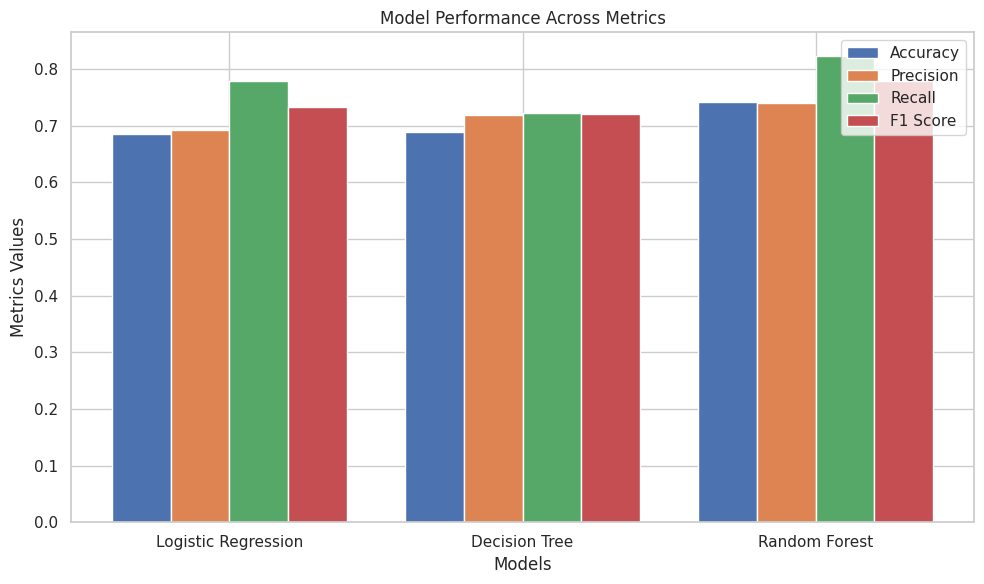

In [ ]:
# Data for the models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy = [0.685849, 0.689791, 0.741821]
precision = [0.693426, 0.719943, 0.740434]
recall = [0.778566, 0.722498, 0.823989]
f1_score = [0.733534, 0.721219, 0.779980]

# Set the position of the bars on the x-axis
x = np.arange(len(models))

# Bar width
width = 0.2

# Create the plot
fig, ax = plt.subplots(figsize=(10,6))

# Plot the bars
bar1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
bar2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
bar3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
bar4 = ax.bar(x + 1.5*width, f1_score, width, label='F1 Score')

# Labeling the plot
ax.set_xlabel('Models')
ax.set_ylabel('Metrics Values')
ax.set_title('Model Performance Across Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

#### D. Compare models to determine which one performs best for predicting coupon acceptance.


In [ ]:
model_metrics = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [0.6858494284588096, 0.6897910918407568, 0.7418210484824596],
    "Precision": [0.6934260429835651, 0.7199434229137199, 0.7404336734693877],
    "Recall": [0.7785663591199432, 0.7224982256919801, 0.8239886444286728],
    "F1 Score": [0.7335339351387495, 0.7212185618136734, 0.7799798454820289]
}

# Create a DataFrame to store the metrics
performance_df = pd.DataFrame(model_metrics)

# View each model's performance
print("Model Performance Comparison:")
print(performance_df)

# Find the best model for each metric
best_f1 = performance_df.loc[performance_df['F1 Score'].idxmax()]
best_recall = performance_df.loc[performance_df['Recall'].idxmax()]
best_precision = performance_df.loc[performance_df['Precision'].idxmax()]
best_accuracy = performance_df.loc[performance_df['Accuracy'].idxmax()]

# View the best models based on different metrics
print("\nBest Model Based on F1 Score:")
print(best_f1)

print("\nBest Model Based on Recall:")
print(best_recall)

print("\nBest Model Based on Precision:")
print(best_precision)

print("\nBest Model Based on Accuracy:")
print(best_accuracy)

# Check if the best models are indeed different
if best_f1.equals(best_recall) and best_recall.equals(best_precision) and best_precision.equals(best_accuracy):
    print("\nAll metrics point to the same best model.")
else:
    print("\nDifferent models may be the best for different metrics.")


Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.685849   0.693426  0.778566  0.733534
1        Decision Tree  0.689791   0.719943  0.722498  0.721219
2        Random Forest  0.741821   0.740434  0.823989  0.779980

Best Model Based on F1 Score:
Model        Random Forest
Accuracy          0.741821
Precision         0.740434
Recall            0.823989
F1 Score           0.77998
Name: 2, dtype: object

Best Model Based on Recall:
Model        Random Forest
Accuracy          0.741821
Precision         0.740434
Recall            0.823989
F1 Score           0.77998
Name: 2, dtype: object

Best Model Based on Precision:
Model        Random Forest
Accuracy          0.741821
Precision         0.740434
Recall            0.823989
F1 Score           0.77998
Name: 2, dtype: object

Best Model Based on Accuracy:
Model        Random Forest
Accuracy          0.741821
Precision         0.740434
Recall            0.823989
F1 Score 

# Week 4: Fine-Tuning and Reporting

##### A. Fine-tune the best-performing model (Random Forest Model) using GridSearchCV to search for optimal hyperparameters (e.g., number of trees, max depth, minimum samples per split, etc.)

In [ ]:
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up the hyperparameter grid: Numer of trees, Maximum depth of the tree, Minimum samples required to split an internal node, and Minimum samples required to be at a leaf node
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf = grid_search.best_estimator_

# View the best hyperparameters found
print(f"Best Hyperparameters: {grid_search.best_params_}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


##### B. Evaluate the Tuned Model on the Test Data and Compare Its Performance with previous models

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict using the best model
y_pred = best_rf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# View performance metrics for the tuned model
print("Best Random Forest Model Performance (After Tuning):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Best Random Forest Model Performance (After Tuning):
Accuracy: 0.7378793851005124
Precision: 0.7282208588957055
Recall: 0.8424414478353442
F1 Score: 0.7811780190852254
